In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 

# Data Initialization

# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
z = iris.data.original

print("Isi Iris Dataset:")
print(z.tail())

print("Statistik Dataset Iris:")
print(z.describe())

print("Tipe Data Dataset Iris:")
print(z.dtypes)

print("Informasi Dataset Iris:")
print(z.info())


Isi Iris Dataset:
     sepal length  sepal width  petal length  petal width           class
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica
Statistik Dataset Iris:
       sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000  

In [9]:
# Data Preprocessing (Standardization)

def standardize_data(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std

X_scaled = standardize_data(X)
print(X_scaled.head())

print(z.isnull().sum())

   sepal length  sepal width  petal length  petal width
0     -0.897674     1.028611     -1.336794    -1.308593
1     -1.139200    -0.124540     -1.336794    -1.308593
2     -1.380727     0.336720     -1.393470    -1.308593
3     -1.501490     0.106090     -1.280118    -1.308593
4     -1.018437     1.259242     -1.336794    -1.308593
sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64


[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]


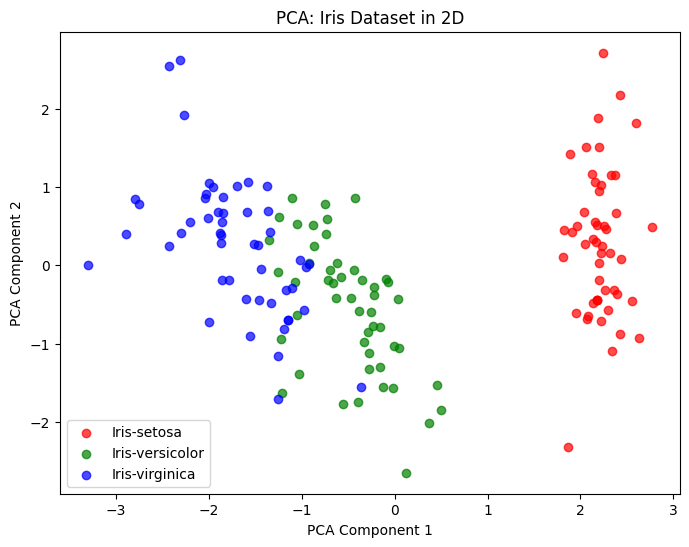

In [3]:
# Implementasi PCA

def compute_pca(X, n_components=2):
    # Step 1: Compute covariance matrix
    covariance_matrix = np.cov(X.T)
    
    # Step 2: Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    
    # Step 3: Sort eigenvalues and eigenvectors
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    # Step 4: Select top n_components
    top_eigenvectors = eigenvectors[:, :n_components]
    
    # Step 5: Transform data
    X_pca = X @ top_eigenvectors
    
    return X_pca, eigenvalues, eigenvectors

covariance_matrix = np.cov(X_scaled.T)
print(covariance_matrix)  # Harus ada angka, bukan NaN atau inf

X_pca, eigenvalues, eigenvectors = compute_pca(X_scaled, n_components=2)
#prnt("Cek tipe X_pca:", type(X_pca))
                                      

# rint("Eigenvalues:", eigenvalues)
# print("Eigenvectors:\n", eigenvectors)

# Convert to DataFrame
X_pca['Class'] = y.squeeze()
X_pca_df = X_pca.copy()
X_pca_df.columns = ['PCA1', 'PCA2', 'Class']
# X_pca_df['Class'] = X_pca_df['Class'].astype('category')

# Visualizing PCA result
plt.figure(figsize=(8,6))
colors = ['r', 'g', 'b']
for target, color in zip(X_pca_df['Class'].unique(), colors):
    subset = X_pca_df[X_pca_df['Class'] == target]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=target, alpha=0.7, color=color)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA: Iris Dataset in 2D')
plt.legend()
plt.show()

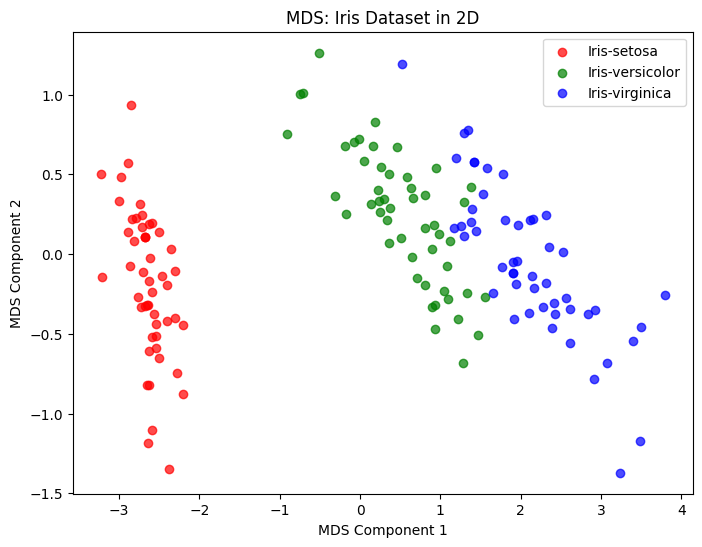

In [7]:
# Implementasi MDS dengan Euclidean Distance

# Step 1: Hitung Jarak Euclidean Antar Semua Titik
distance_matrix = squareform(pdist(X, metric='euclidean'))

# Step 2: Bangun Matriks Jarak yang Ditransformasi (Double Centering)
n = distance_matrix.shape[0]
H = np.eye(n) - (1/n) * np.ones((n, n))  # Matriks centering
B = -0.5 * H @ (distance_matrix ** 2) @ H  # Transformasi matriks jarak

# Step 3: Hitung Eigenvalues dan Eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(B)  # eigh untuk matriks simetris

# Step 4: Urutkan Eigenvalues dan Eigenvectors dari yang terbesar
sorted_indices = np.argsort(eigenvalues)[::-1]  # Urutkan dari besar ke kecil
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Step 5: Pilih 2 Komponen Utama (MDS ke 2D)
top_2_eigenvectors = eigenvectors[:, :2] * np.sqrt(eigenvalues[:2])  # Skalakan dengan sqrt(eigenvalue)
X_mds = top_2_eigenvectors

# Konversi ke DataFrame agar lebih mudah dibaca
X_mds_df = pd.DataFrame(X_mds, columns=['MDS1', 'MDS2'])
X_mds_df['Class'] = iris.data.targets

# Visualisasi hasil MDS
plt.figure(figsize=(8,6))
for target, color in zip(X_mds_df['Class'].unique(), ['r', 'g', 'b']):
    subset = X_mds_df[X_mds_df['Class'] == target]
    plt.scatter(subset['MDS1'], subset['MDS2'], label=target, alpha=0.7, c=color)

plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.title('MDS: Iris Dataset in 2D')
plt.legend()
plt.show()

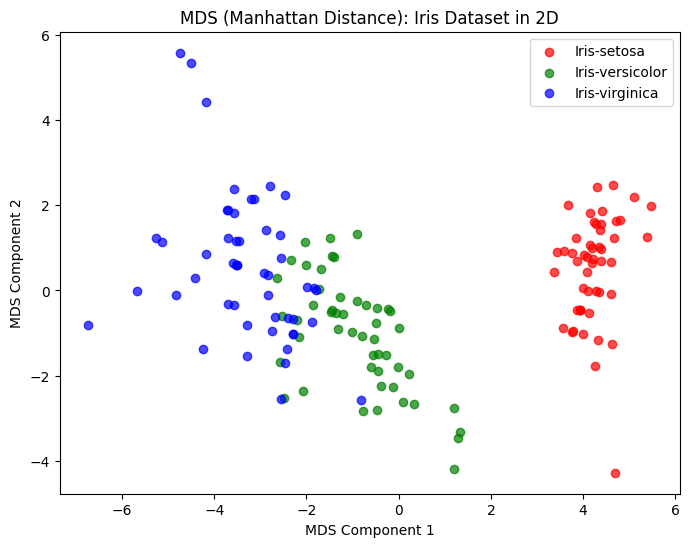

In [5]:
# Implementasi MDS dengan Manhattan Distance

# Step 1: Hitung Jarak Manhattan Antar Semua Titik
distance_matrix = squareform(pdist(X_scaled, metric='cityblock'))

# Step 2: Bangun Matriks Jarak yang Ditransformasi (Double Centering)
n = distance_matrix.shape[0]
H = np.eye(n) - (1/n) * np.ones((n, n))  # Matriks centering
B = -0.5 * H @ (distance_matrix ** 2) @ H  # Transformasi matriks jarak

# Step 3: Hitung Eigenvalues dan Eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(B)  # eigh untuk matriks simetris

# Step 4: Urutkan Eigenvalues dan Eigenvectors dari yang terbesar
sorted_indices = np.argsort(eigenvalues)[::-1]  # Urutkan dari besar ke kecil
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Step 5: Pilih 2 Komponen Utama (MDS ke 2D)
top_2_eigenvectors = eigenvectors[:, :2] * np.sqrt(eigenvalues[:2])  # Skalakan dengan sqrt(eigenvalue)
X_mds = top_2_eigenvectors

# Konversi ke DataFrame agar lebih mudah dibaca
X_mds_df = pd.DataFrame(X_mds, columns=['MDS1', 'MDS2'])
X_mds_df['Class'] = iris.data.targets

# Visualisasi hasil MDS
plt.figure(figsize=(8,6))
for target, color in zip(X_mds_df['Class'].unique(), ['r', 'g', 'b']):
    subset = X_mds_df[X_mds_df['Class'] == target]
    plt.scatter(subset['MDS1'], subset['MDS2'], label=target, alpha=0.7, c=color)

plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.title('MDS (Manhattan Distance): Iris Dataset in 2D')
plt.legend()
plt.show()

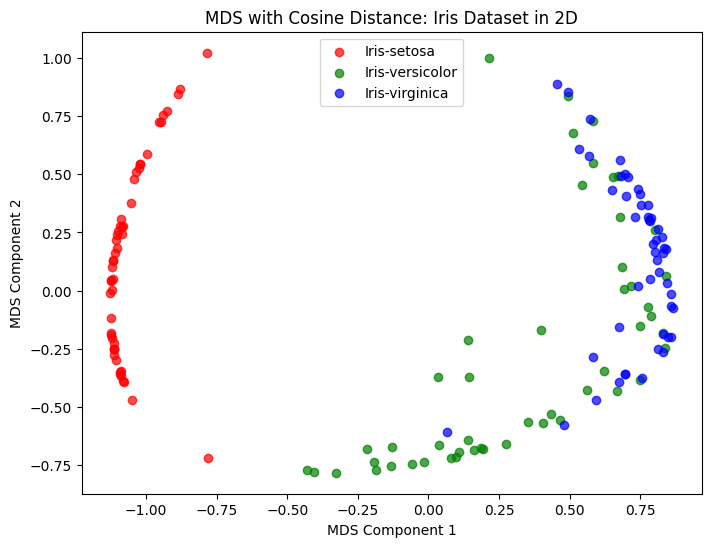

In [6]:
# Implementasi MDS dengan Cosine Distance

# Step 1: Compute Cosine Distance Matrix
distance_matrix = squareform(pdist(X_scaled, metric='cosine'))

# Step 2: Construct Double-Centered Distance Matrix
n = distance_matrix.shape[0]
H = np.eye(n) - (1/n) * np.ones((n, n))  # Centering matrix
B = -0.5 * H @ (distance_matrix ** 2) @ H  # Transformed distance matrix

# Step 3: Compute Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(B)  # eigh for symmetric matrix

# Step 4: Sort Eigenvalues and Eigenvectors in Descending Order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Step 5: Select Top 2 Components
X_mds_cosine = eigenvectors[:, :2] * np.sqrt(eigenvalues[:2])

# Convert to DataFrame
X_mds_df = pd.DataFrame(X_mds_cosine, columns=['MDS1', 'MDS2'])
X_mds_df['Class'] = y.values.ravel()

# Step 6: Visualization
plt.figure(figsize=(8,6))
for target, color in zip(X_mds_df['Class'].unique(), ['r', 'g', 'b']):
    subset = X_mds_df[X_mds_df['Class'] == target]
    plt.scatter(subset['MDS1'], subset['MDS2'], label=target, alpha=0.7, c=color)

plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.title('MDS with Cosine Distance: Iris Dataset in 2D')
plt.legend()
plt.show()